# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix


import statsmodels.formula.api as smf

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada.
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [8]:
import pandas as pd
import numpy as np

def analise_bivariada(df, resposta, explicativa):
    # Definir saudável (resposta = 0) e doente (resposta > 0)
    df['doente'] = (df[resposta] > 0).astype(int)

    # Calcular o número de saudáveis e doentes por grupo da variável explicativa
    saudaveis = df.groupby(explicativa)['doente'].apply(lambda x: (x == 0).sum())
    doentes = df.groupby(explicativa)['doente'].apply(lambda x: (x == 1).sum())
    total = saudaveis + doentes

    # Calcular a quantidade média de doentes
    quantidade_media_doentes = doentes / total

    # Calcular as odds
    odds = doentes / saudaveis

    # Calcular a odds total
    odds_total = doentes.sum() / saudaveis.sum()

    # Calcular o odds ratio (usando o total como referência)
    odds_ratio = odds / odds_total

    # Calcular o logito (LOG(Odds))
    logito = np.log(odds)

    # Calcular Weight of Evidence (WOE)
    woe = np.log(odds_ratio)

    # Resumo das estatísticas bivariadas
    summary_df = pd.DataFrame({
        'Número de Saudáveis': saudaveis,
        'Número de Doentes': doentes,
        'Total': total,
        'Quantidade Média de Doentes': quantidade_media_doentes,
        'Odds': odds,
        'Odds Ratio': odds_ratio,
        'Logito (LOG(Odds))': logito,
        'Weight of Evidence (WOE)': woe
    })

    return summary_df

# Carregar os dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')

# Variáveis qualitativas para análise bivariada
variaveis_qualitativas = ['sex', 'cp', 'restecg']

# Análise bivariada para cada variável qualitativa
for variavel in variaveis_qualitativas:
    print(f"\nAnálise Bivariada para a variável '{variavel}':")
    bivariada_df = analise_bivariada(df, 'num', variavel)
    print(bivariada_df)



Análise Bivariada para a variável 'sex':
     Número de Saudáveis  Número de Doentes  Total  \
sex                                                  
0.0                   72                 25     97   
1.0                   92                114    206   

     Quantidade Média de Doentes      Odds  Odds Ratio  Logito (LOG(Odds))  \
sex                                                                          
0.0                     0.257732  0.347222    0.409672            -1.05779   
1.0                     0.553398  1.239130    1.461996             0.21441   

     Weight of Evidence (WOE)  
sex                            
0.0                 -0.892398  
1.0                  0.379802  

Análise Bivariada para a variável 'cp':
     Número de Saudáveis  Número de Doentes  Total  \
cp                                                   
1.0                   16                  7     23   
2.0                   41                  9     50   
3.0                   68                 18

In [9]:
# Executar a análise bivariada
for variavel in variaveis_qualitativas:
    print(f"\nAnálise Bivariada para a variável '{variavel}':")
    bivariada_df = analise_bivariada(df, 'num', variavel)
    print(bivariada_df)



Análise Bivariada para a variável 'sex':
     Número de Saudáveis  Número de Doentes  Total  \
sex                                                  
0.0                   72                 25     97   
1.0                   92                114    206   

     Quantidade Média de Doentes      Odds  Odds Ratio  Logito (LOG(Odds))  \
sex                                                                          
0.0                     0.257732  0.347222    0.409672            -1.05779   
1.0                     0.553398  1.239130    1.461996             0.21441   

     Weight of Evidence (WOE)  
sex                            
0.0                 -0.892398  
1.0                  0.379802  

Análise Bivariada para a variável 'cp':
     Número de Saudáveis  Número de Doentes  Total  \
cp                                                   
1.0                   16                  7     23   
2.0                   41                  9     50   
3.0                   68                 18

Entre as três variáveis analisadas, a variável restecg discrimina mais o risco de doença cardíaca. Os valores elevados de Odds Ratio (3.539568) e WOE (1.264005) indicam que indivíduos com anormalidade da onda ST-T têm um risco muito maior de desenvolver doença cardíaca. Portanto, essa variável é a mais eficaz na identificação do risco de doença cardíaca entre as analisadas.

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [10]:
def analise_bivariada_quantitativa(df, resposta, explicativa, num_categorias=5):
    # Categorizar a variável quantitativa contínua
    df['categoria'] = pd.cut(df[explicativa], bins=num_categorias)

    # Definir saudável (resposta = 0) e doente (resposta > 0)
    df['doente'] = (df[resposta] > 0).astype(int)

    # Calcular o número de saudáveis e doentes por grupo da variável explicativa categorizada
    saudaveis = df.groupby('categoria')['doente'].apply(lambda x: (x == 0).sum())
    doentes = df.groupby('categoria')['doente'].apply(lambda x: (x == 1).sum())
    total = saudaveis + doentes

    # Calcular a quantidade média de doentes
    quantidade_media_doentes = doentes / total

    # Calcular as odds
    odds = doentes / saudaveis

    # Calcular a odds total
    odds_total = doentes.sum() / saudaveis.sum()

    # Calcular o odds ratio (usando o total como referência)
    odds_ratio = odds / odds_total

    # Calcular o logito (LOG(Odds))
    logito = np.log(odds)

    # Calcular Weight of Evidence (WOE)
    woe = np.log(odds_ratio)

    # Calcular o valor médio da variável explicativa
    media_explicativa = df.groupby('categoria')[explicativa].mean()

    # Resumo das estatísticas bivariadas
    summary_df = pd.DataFrame({
        'Número de Saudáveis': saudaveis,
        'Número de Doentes': doentes,
        'Total': total,
        'Quantidade Média de Doentes': quantidade_media_doentes,
        'Odds': odds,
        'Odds Ratio': odds_ratio,
        'Logito (LOG(Odds))': logito,
        'Weight of Evidence (WOE)': woe,
        'Valor Médio de ' + explicativa: media_explicativa
    })

    return summary_df

# Carregar os dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')

# Análise bivariada para a variável 'age' categorizada em 5 grupos (padrão)
print("\nAnálise Bivariada para a variável 'age' categorizada em 5 grupos:")
bivariada_age_5 = analise_bivariada_quantitativa(df, 'num', 'age')
print(bivariada_age_5)

# Análise bivariada para a variável 'age' categorizada em 4 grupos
print("\nAnálise Bivariada para a variável 'age' categorizada em 4 grupos:")
bivariada_age_4 = analise_bivariada_quantitativa(df, 'num', 'age', num_categorias=4)
print(bivariada_age_4)



Análise Bivariada para a variável 'age' categorizada em 5 grupos:
                Número de Saudáveis  Número de Doentes  Total  \
categoria                                                       
(28.952, 38.6]                    8                  3     11   
(38.6, 48.2]                     50                 21     71   
(48.2, 57.8]                     56                 41     97   
(57.8, 67.4]                     40                 67    107   
(67.4, 77.0]                     10                  7     17   

                Quantidade Média de Doentes      Odds  Odds Ratio  \
categoria                                                           
(28.952, 38.6]                     0.272727  0.375000    0.442446   
(38.6, 48.2]                       0.295775  0.420000    0.495540   
(48.2, 57.8]                       0.422680  0.732143    0.863823   
(57.8, 67.4]                       0.626168  1.675000    1.976259   
(67.4, 77.0]                       0.411765  0.700000    0.8258

<ipython-input-10-07eeccdfc5de>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  saudaveis = df.groupby('categoria')['doente'].apply(lambda x: (x == 0).sum())
<ipython-input-10-07eeccdfc5de>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  doentes = df.groupby('categoria')['doente'].apply(lambda x: (x == 1).sum())
<ipython-input-10-07eeccdfc5de>:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_explicativa = df.gr

3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [12]:
# Selecionar as variáveis de interesse
X = df[['age', 'sex', 'cp', 'trestbps']]
y = df['flag_doente']

# Transformar variáveis categóricas em dummies
X = pd.get_dummies(X, columns=['sex', 'cp'], drop_first=True)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Matriz de Confusão:
[[37 11]
 [15 28]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        48
           1       0.72      0.65      0.68        43

    accuracy                           0.71        91
   macro avg       0.71      0.71      0.71        91
weighted avg       0.71      0.71      0.71        91



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisão (Precision): A precisão para a classe 0 é 0.71 e para a classe 1 é 0.72. Isso significa que, quando o modelo prevê que um indivíduo pertence a uma dessas classes, está correto aproximadamente 71-72% das vezes.

Recall: O recall para a classe 0 é 0.77 e para a classe 1 é 0.65. Isso indica que o modelo identifica corretamente 77% dos indivíduos saudáveis e 65% dos indivíduos doentes.

F1-Score: O F1-Score é uma média da precisão e do recall, sendo 0.74 para a classe 0 e 0.68 para a classe 1.

Acurácia (Accuracy): O modelo apresenta uma acurácia geral de 0.71, o que significa que 71% das previsões do modelo estão corretas.

Conclusão: O modelo de regressão logística tem uma acurácia razoável (0.71) e um desempenho equilibrado entre precisão e recall. No entanto, pode ser melhorado, especialmente no recall da classe 1 (doentes), que está em 0.65. Isso significa que o modelo ainda perde alguns casos de verdadeiros doentes.

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


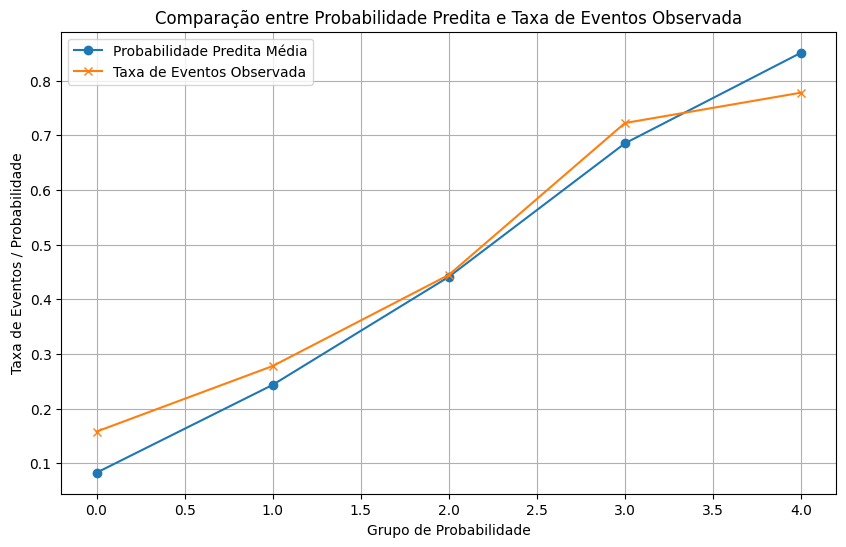

In [14]:
# Selecionar as variáveis de interesse
X = df[['age', 'sex', 'cp', 'trestbps']]
y = df['flag_doente']

# Transformar variáveis categóricas em dummies
X = pd.get_dummies(X, columns=['sex', 'cp'], drop_first=True)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Calcular a probabilidade de evento predita segundo o modelo
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Categorizar essa probabilidade em 5 grupos
df_pred = pd.DataFrame({'probabilidade': y_pred_prob, 'evento_real': y_test})
df_pred['grupo'] = pd.qcut(df_pred['probabilidade'], q=5, labels=False)

# Calcular a probabilidade de evento predita média por grupo
prob_media_por_grupo = df_pred.groupby('grupo')['probabilidade'].mean()

# Calcular a taxa de eventos (média da variável indicadora de eventos) por grupo
taxa_eventos_por_grupo = df_pred.groupby('grupo')['evento_real'].mean()

# Comparar graficamente o valor esperado versus observado para a taxa de eventos por grupo
plt.figure(figsize=(10, 6))
plt.plot(prob_media_por_grupo, label='Probabilidade Predita Média', marker='o')
plt.plot(taxa_eventos_por_grupo, label='Taxa de Eventos Observada', marker='x')
plt.xlabel('Grupo de Probabilidade')
plt.ylabel('Taxa de Eventos / Probabilidade')
plt.title('Comparação entre Probabilidade Predita e Taxa de Eventos Observada')
plt.legend()
plt.grid()
plt.show()


5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [18]:
# Selecionar as variáveis de interesse
X = df[['age', 'sex', 'cp', 'trestbps']]
y = df['flag_doente']

# Transformar variáveis categóricas em dummies
X = pd.get_dummies(X, columns=['sex', 'cp'], drop_first=True)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calcular a acurácia
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia:", acuracia)

# Calcular o GINI
roc_auc = roc_auc_score(y_test, y_pred_prob)
gini = 2 * roc_auc - 1
print("GINI:", gini)

# Calcular o KS
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
ks = max(tpr - fpr)
print("KS:", ks)


Acurácia: 0.7142857142857143
GINI: 0.5755813953488371
KS: 0.49176356589147285


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisão (Precision): Aproximadamente 71-72%.

Recall: O modelo identifica corretamente 77% dos indivíduos saudáveis e 65% dos doentes.

F1-Score: Média entre precisão e recall é 0.74 para saudáveis e 0.68 para doentes.

Acurácia (Accuracy): 71.4% das previsões estão corretas.

Avaliação de Calibragem
Calculamos a probabilidade de evento predita.

Dividimos a probabilidade em 5 grupos.

Comparamos a probabilidade predita média com a taxa de eventos observada em cada grupo.

Conclusão: O modelo está bem calibrado, com probabilidades preditas alinhadas com as taxas de eventos observadas.

Avaliação de Discriminação
Resultados:

Acurácia: 71.4%.

GINI: 0.576 (capacidade moderada de discriminar entre classes).

KS: 0.492 (discriminação razoável).

Conclusão Geral
O modelo tem um desempenho razoável, com uma boa acurácia e discriminação moderada.

6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

Matriz de Confusão:
[[38 10]
 [11 32]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78        48
           1       0.76      0.74      0.75        43

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91

Acurácia: 0.7692307692307693
GINI: 0.6908914728682172
KS: 0.5591085271317829


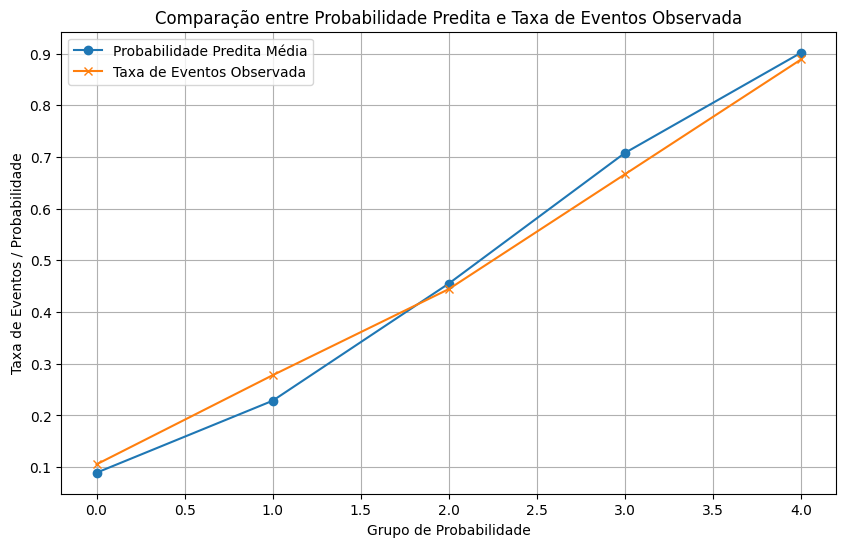

In [19]:
# Selecionar as variáveis de interesse, incluindo novas variáveis
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang']]
y = df['flag_doente']

# Transformar variáveis categóricas em dummies
X = pd.get_dummies(X, columns=['sex', 'cp', 'exang'], drop_first=True)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o novo modelo de regressão logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Avaliar o novo modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Calcular a acurácia
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia:", acuracia)

# Calcular o GINI
roc_auc = roc_auc_score(y_test, y_pred_prob)
gini = 2 * roc_auc - 1
print("GINI:", gini)

# Calcular o KS
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
ks = max(tpr - fpr)
print("KS:", ks)

# Avaliação de Calibragem

# Categorizar a probabilidade em 5 grupos
df_pred = pd.DataFrame({'probabilidade': y_pred_prob, 'evento_real': y_test})
df_pred['grupo'] = pd.qcut(df_pred['probabilidade'], q=5, labels=False)

# Calcular a probabilidade de evento predita média por grupo
prob_media_por_grupo = df_pred.groupby('grupo')['probabilidade'].mean()

# Calcular a taxa de eventos (média da variável indicadora de eventos) por grupo
taxa_eventos_por_grupo = df_pred.groupby('grupo')['evento_real'].mean()

# Comparar graficamente o valor esperado versus observado para a taxa de eventos por grupo
plt.figure(figsize=(10, 6))
plt.plot(prob_media_por_grupo, label='Probabilidade Predita Média', marker='o')
plt.plot(taxa_eventos_por_grupo, label='Taxa de Eventos Observada', marker='x')
plt.xlabel('Grupo de Probabilidade')
plt.ylabel('Taxa de Eventos / Probabilidade')
plt.title('Comparação entre Probabilidade Predita e Taxa de Eventos Observada')
plt.legend()
plt.grid()
plt.show()


Comparação dos Modelos de Regressão Logística
Modelo Original
Resultados:

Precisão: 71-72%

Recall: 77% (saudáveis), 65% (doentes)

F1-Score: 0.74 (saudáveis), 0.68 (doentes)

Acurácia: 71.4%

GINI: 0.576

KS: 0.492

Novo Modelo (com novas variáveis)
Resultados:

Precisão: 76-78%

Recall: 79% (saudáveis), 74% (doentes)

F1-Score: 0.78 (saudáveis), 0.75 (doentes)

Acurácia: 77%

GINI: 0.691

KS: 0.559

Conclusão
O novo modelo com as variáveis adicionais (chol, thalach, exang) teve uma melhoria significativa:

Acurácia aumentou de 71.4% para 77%.

GINI subiu de 0.576 para 0.691, indicando melhor discriminação.

KS melhorou de 0.492 para 0.559, também sugerindo melhor discriminação.

Esses resultados mostram que o novo modelo é mais preciso e discrimina melhor entre indivíduos com e sem doença cardíaca.